## **How Old is this Abalone?: Predicting the Age of Abalone Based on Physical Measurements**

In [1]:
library(tidyverse)
library(readr)
library(repr)
library(tidymodels)
library(GGally)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

## Introduction

Abalone is a type of marine snail that is highly cherished for its meat and shells. Its meat is a delicacy that is among one of the most expensive seafood in the world, while its shells are best used for jewelry and decorative objects. Determining the age of abalone is crucial for sustainable harvesting and our project aims to analyze a dataset on abalone characteristics to develop a predictive model for estimating their age. By identifying key characteristics that correlate with age, we can contribute helpful information to resource management and also broaden our knowledge of abalone population dynamics. The regression-type question we will be attempting to answer is, "Can we accurately predict the age of abalone based on their physical features?" The dataset used for this project contains numerous physical measurements such as their length, diameter, and number of rings. It contains 9 different features (columns) and 4,177 instances (rows) of data about various abalones. The age of the abalone is determined by the rings formed inside its inner shell. However, since some rings are hard to see even under a microscope, adding 1.5 to its ring counts is traditionally accepted when measuring the age, our target variable. This dataset offers a valuable resource for evaluating the relationship between abalone characteristics and their age.

In [2]:
abalone <- read_csv("https://raw.githubusercontent.com/miriamt3/abalone_project/main/abalone.csv")

colnames(abalone) <- make.names(colnames(abalone))
abalone

Rows: 4177 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Sex
dbl (8): Length, Diameter, Height, Whole weight, Shucked weight, Viscera wei...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.308,9
F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10
M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


In [3]:
abalone <- mutate(abalone, Age = Rings + 1.5)
abalone

Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings,Age
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,16.5
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,8.5
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9,10.5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.308,9,10.5
F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10,11.5
M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12,13.5


In [4]:
set.seed(2000) 
abalone_split <- initial_split(abalone, prop = 0.75, strata = Age)  
abalone_train <- training(abalone_split)   
abalone_test <- testing(abalone_split)
abalone_train
abalone_test

Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings,Age
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5
M,0.465,0.355,0.105,0.4795,0.2270,0.1240,0.125,8,9.5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
M,0.655,0.525,0.180,1.4020,0.6240,0.2935,0.365,13,14.5
F,0.655,0.500,0.220,1.3590,0.6420,0.3255,0.405,13,14.5
M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12,13.5


Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings,Age
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
M,0.500,0.380,0.125,0.5770,0.269,0.1265,0.1535,9,10.5
M,0.590,0.440,0.135,0.9660,0.439,0.2145,0.2605,10,11.5
F,0.625,0.485,0.150,1.0945,0.531,0.2610,0.2960,10,11.5


## Wrangling Data for Predictor Selection

In [5]:
summarized_abalone_train <- abalone_train %>%
  group_by(Age) %>%
  summarise(
    Num_observations = n(),
    Mean_Length = mean(Length, na.rm = TRUE),
    Mean_Diameter = mean(Diameter, na.rm = TRUE),
    Mean_Height = mean(Height, na.rm = TRUE),  
    Mean_Whole.weight = mean(Whole.weight, na.rm = TRUE),
    Mean_Shucked.weight = mean(Shucked.weight, na.rm = TRUE),
    Mean_Viscera.weight = mean(Viscera.weight, na.rm = TRUE),
    Mean_Shell.weight = mean(Shell.weight, na.rm = TRUE),
    Mean_Rings = mean(Rings, na.rm = TRUE),
    
      
    Missing_Data_Count = sum(is.na(Length) | is.na(Diameter) | is.na(Height)| is.na(Whole.weight)|is.na(Shucked.weight)|
    is.na(Viscera.weight)|is.na(Shell.weight)|is.na(Rings))
    ) %>%
  ungroup() %>%
  mutate(Class = ifelse(is.na(Age), "Total", Age))

summarized_abalone_train

Age,Num_observations,Mean_Length,Mean_Diameter,Mean_Height,Mean_Whole.weight,Mean_Shucked.weight,Mean_Viscera.weight,Mean_Shell.weight,Mean_Rings,Missing_Data_Count,Class
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
2.5,1,0.0750000,0.0550000,0.01000000,0.00200000,0.00100000,5e-04,0.001500000,1,0,2.5
3.5,1,0.1500000,0.1000000,0.02500000,0.01500000,0.00450000,4e-03,0.005000000,2,0,3.5
4.5,9,0.1755556,0.1277778,0.04055556,0.02655556,0.01072222,6e-03,0.008333333,3,0,4.5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
26.5,1,0.6450,0.490,0.2150,1.4060,0.4265,0.2285,0.510,25,0,26.5
28.5,2,0.6075,0.500,0.2025,1.6980,0.5390,0.2980,0.705,27,0,28.5
30.5,1,0.7000,0.585,0.1850,1.8075,0.7055,0.3215,0.475,29,0,30.5


## Plot Summary of Predictors

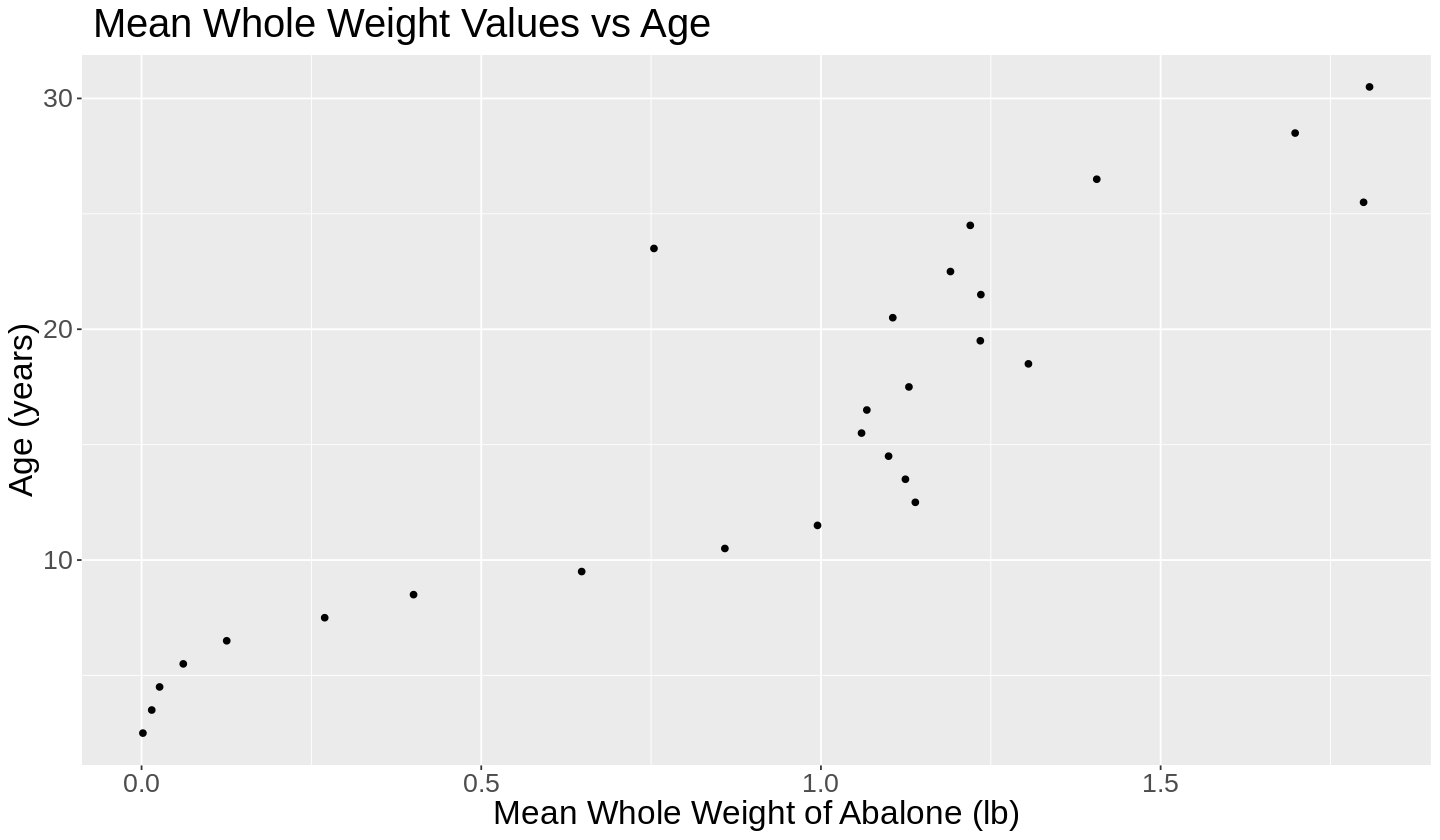

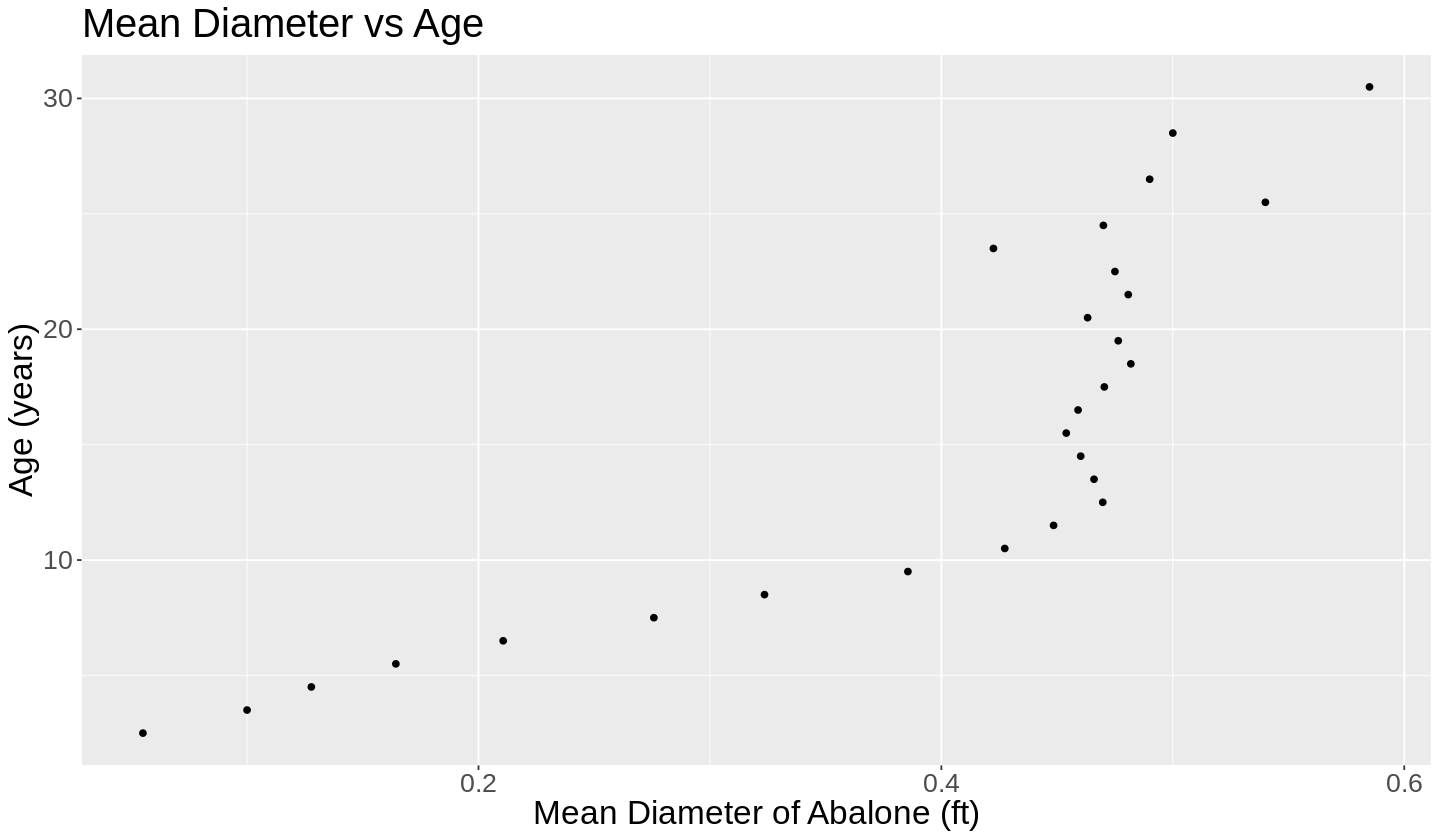

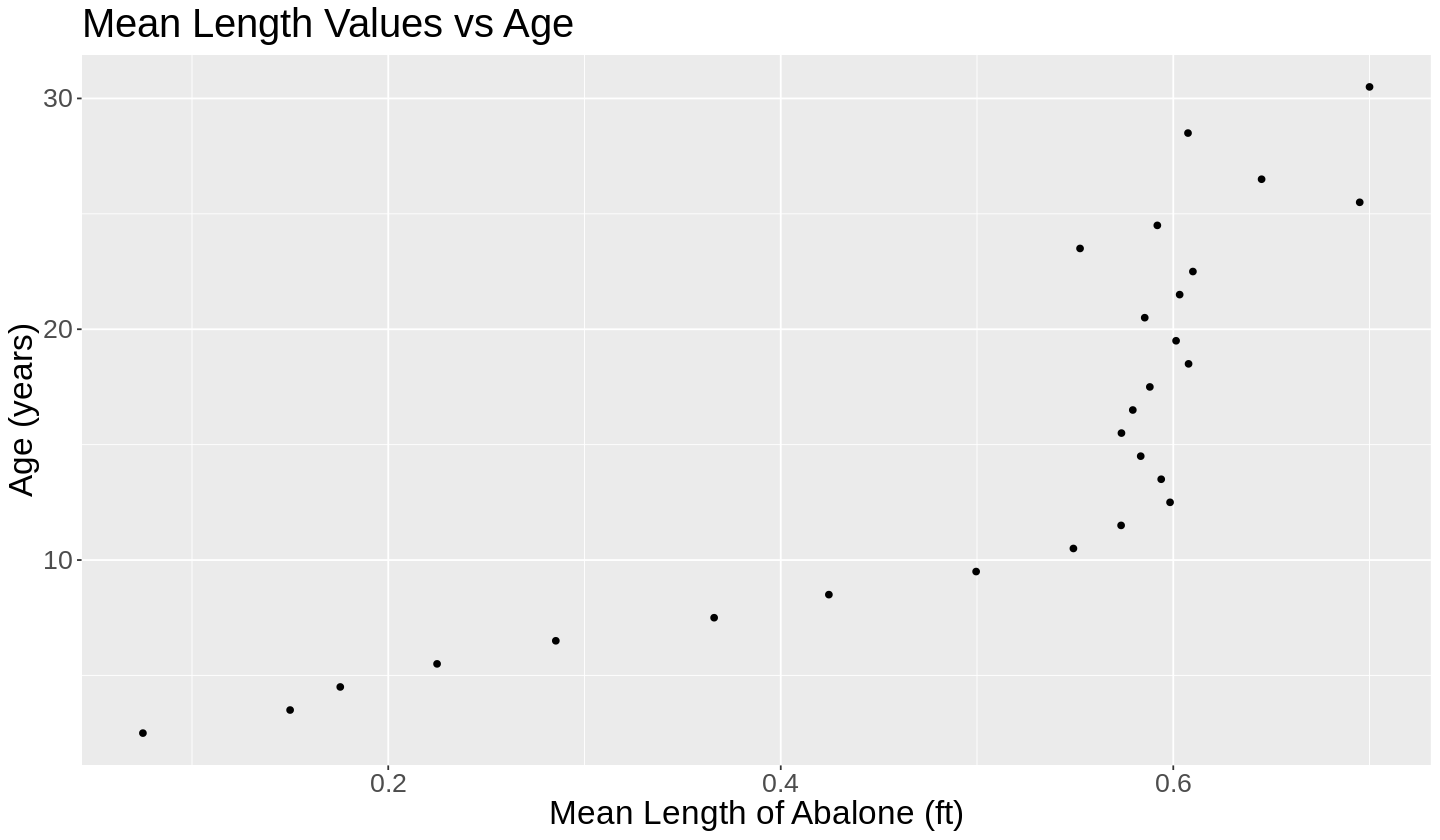

In [6]:
options(repr.plot.width = 12, repr.plot.height = 7)

summarized_plot <- summarized_abalone_train |>
    ggplot(aes(x = Mean_Whole.weight, y = Age))+
    geom_point() +
    labs(x = "Mean Whole Weight of Abalone (lb)", y = "Age (years)", title = " Mean Whole Weight Values vs Age") +
    theme(text = element_text(size = 20))

summarized_plot

summarized_plot_2 <- summarized_abalone_train |>
    ggplot(aes(x = Mean_Diameter, y = Age))+
    geom_point() +
    labs(x = "Mean Diameter of Abalone (ft)", y = "Age (years)", title = "Mean Diameter vs Age") +
 theme(text = element_text(size = 20))

summarized_plot_2

# summarized_plot_3 <- summarized_abalone_train |>
#     ggplot(aes(x = Mean_Rings))+
#     geom_histogram(binwidth = 5, colour = "white", fill = "blue") +
#     labs(x = "Mean Rings of Abalone", y = "Frequency", title = "Frequency of Mean Ring Values")
# summarized_plot_3

summarized_plot_4 <- summarized_abalone_train |>
    ggplot(aes(x = Mean_Length, y = Age))+
    geom_point() +
    labs(x = "Mean Length of Abalone (ft)", y = "Age (years)", title = "Mean Length Values vs Age") +
    theme(text = element_text(size = 20))
summarized_plot_4

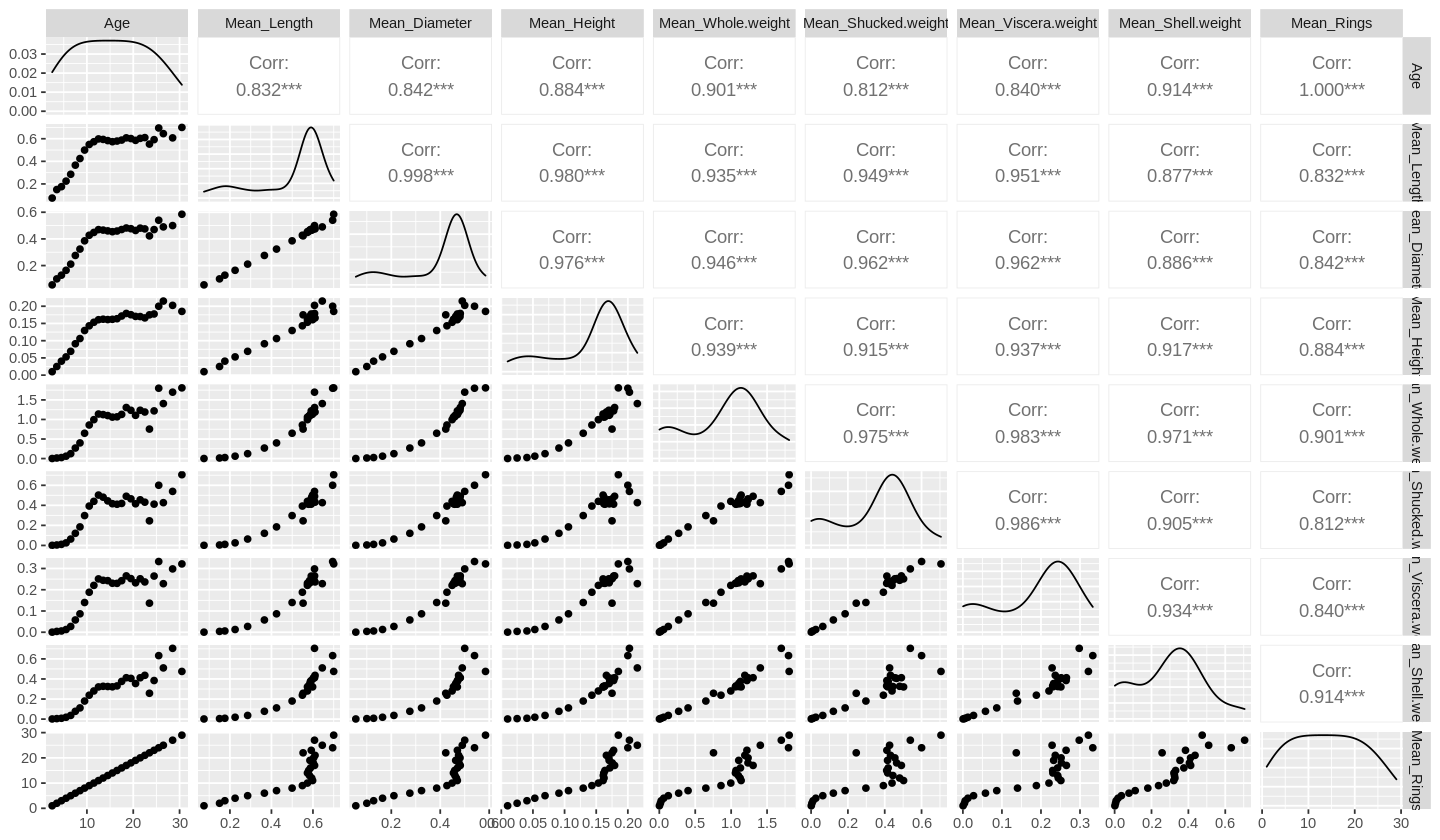

In [7]:
pairs <- summarized_abalone_train |>
    select(Age, Mean_Length, Mean_Diameter, Mean_Height, Mean_Whole.weight, Mean_Shucked.weight, Mean_Viscera.weight, Mean_Shell.weight, Mean_Rings) |>
    ggpairs()

pairs

## Reasoning for Predictors

The reason we picked whole weight, shell weight, and height as our predictors is because out of all the predictors, these 3 showed the strongest positive relationship with our target variable, age. From the ggpairs plots, we can observe that all 3 predictors are higher in correlation compared to the other variables. A strong correlation often indicates a meaningful relationship between our target variable and our predictor. Additionally, variables with stronger correlation might help with predictions. In other words, as the predictor changes, often, the target variable also changes, improving the models ability to predict. Since the original dataset did not have an age column, we mutated the dataset to create a new age column by adding a value of 1.5 to each value in the "Rings" columns. This is a widely accepted method of approximating an abalone's age (Hossain & Chowdhury, 2019) as some rings of the shell are not easily visible, even under a microscope. It is also worth noting that at approximately 12.5 years of age, we see that the abalones do not show much growth in terms of its length, diameter, and whole weight. This phenomenon may be caused by human activity/harvesting because abalones do not simply have a stunted growth at 12.5 years old and then start growing again about 10 years later. When abalones are about 4 years old, they reach a size where they are considered "marketable" (Venter et al., 2018), so by the time the abalones reach 12.5 years old, most of them would be harvested by then.



## KNN Regression Analysis

In [25]:
set.seed(2000)
abalone_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression") 

abalone_recipe <- recipe(Age ~ Height + Shell.weight + Whole.weight, data = abalone_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

abalone_vfold <- vfold_cv(abalone_train, v = 10, strata = Age)

gridvals <- tibble(neighbors = seq(1:60))

abalone_fit <- workflow() |>
    add_recipe(abalone_recipe) |>
    add_model(abalone_spec) |>
    tune_grid(resamples = abalone_vfold, grid = gridvals) |>
    collect_metrics() 

abalone_accuracy <- abalone_fit |>
    filter(.metric == "rmse") |>
    arrange(mean) |>
    slice(1) |>
    pull(neighbors)

abalone_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = abalone_accuracy) |>
    set_engine("kknn") |>
    set_mode("regression") 

abalone_workflow <- workflow() |>
    add_recipe(abalone_recipe) |>
    add_model(abalone_spec_2) |>
    fit(data = abalone_train) 

abalone_predictions <- abalone_workflow |>
    predict(abalone_test) |>
    bind_cols(abalone_test) |>
    metrics(truth = Age, estimate = .pred) |>
    filter(.metric == "rmse") |>
    select(.estimate) |>
    pull()

abalone_predictions

[1] 2.387691

.pred,Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings,Age
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.944444,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
8.092593,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5
9.500000,M,0.465,0.355,0.105,0.4795,0.2270,0.1240,0.125,8,9.5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
11.87037,M,0.655,0.525,0.180,1.4020,0.6240,0.2935,0.365,13,14.5
14.03704,F,0.655,0.500,0.220,1.3590,0.6420,0.3255,0.405,13,14.5
13.46296,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12,13.5


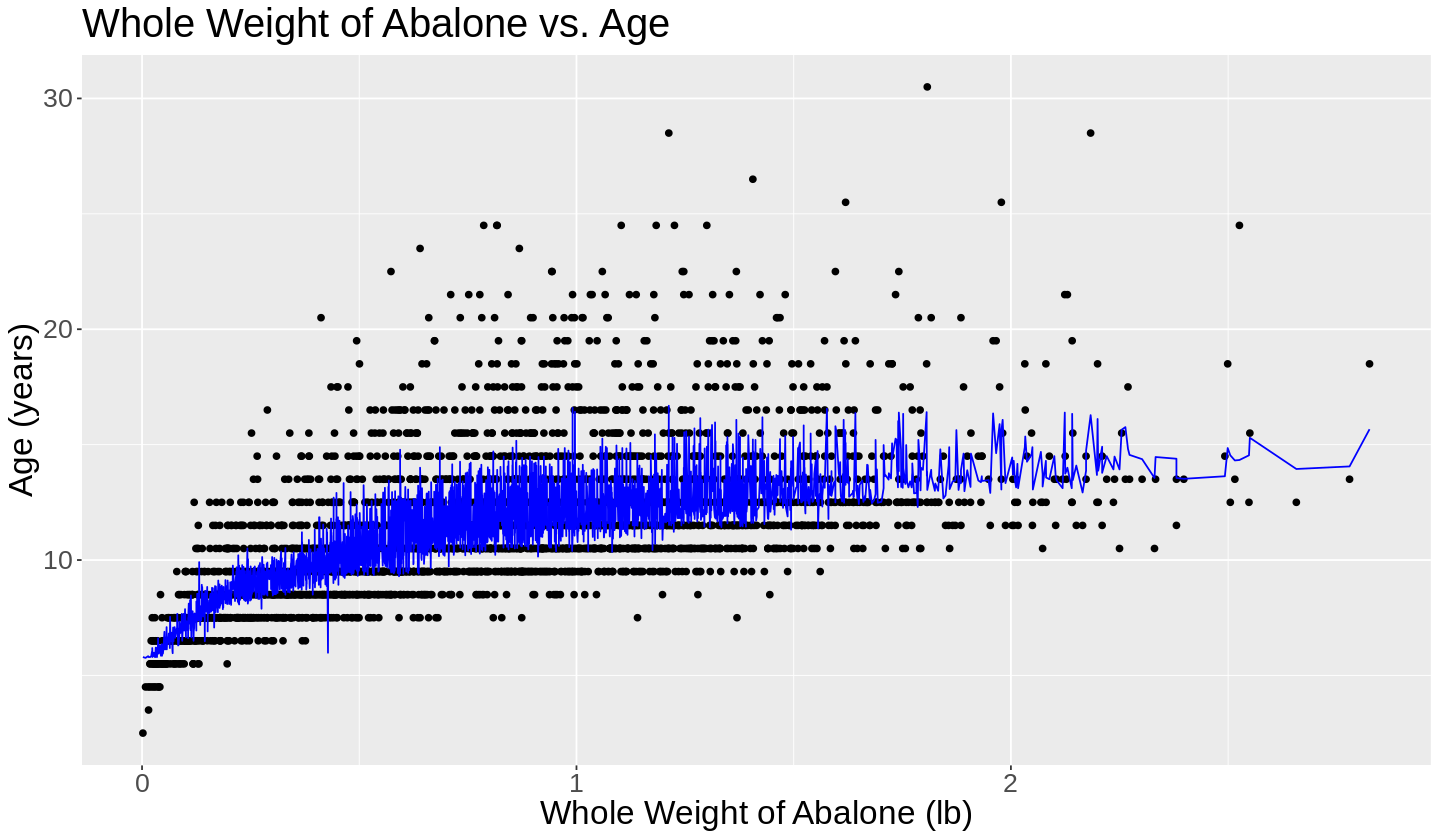

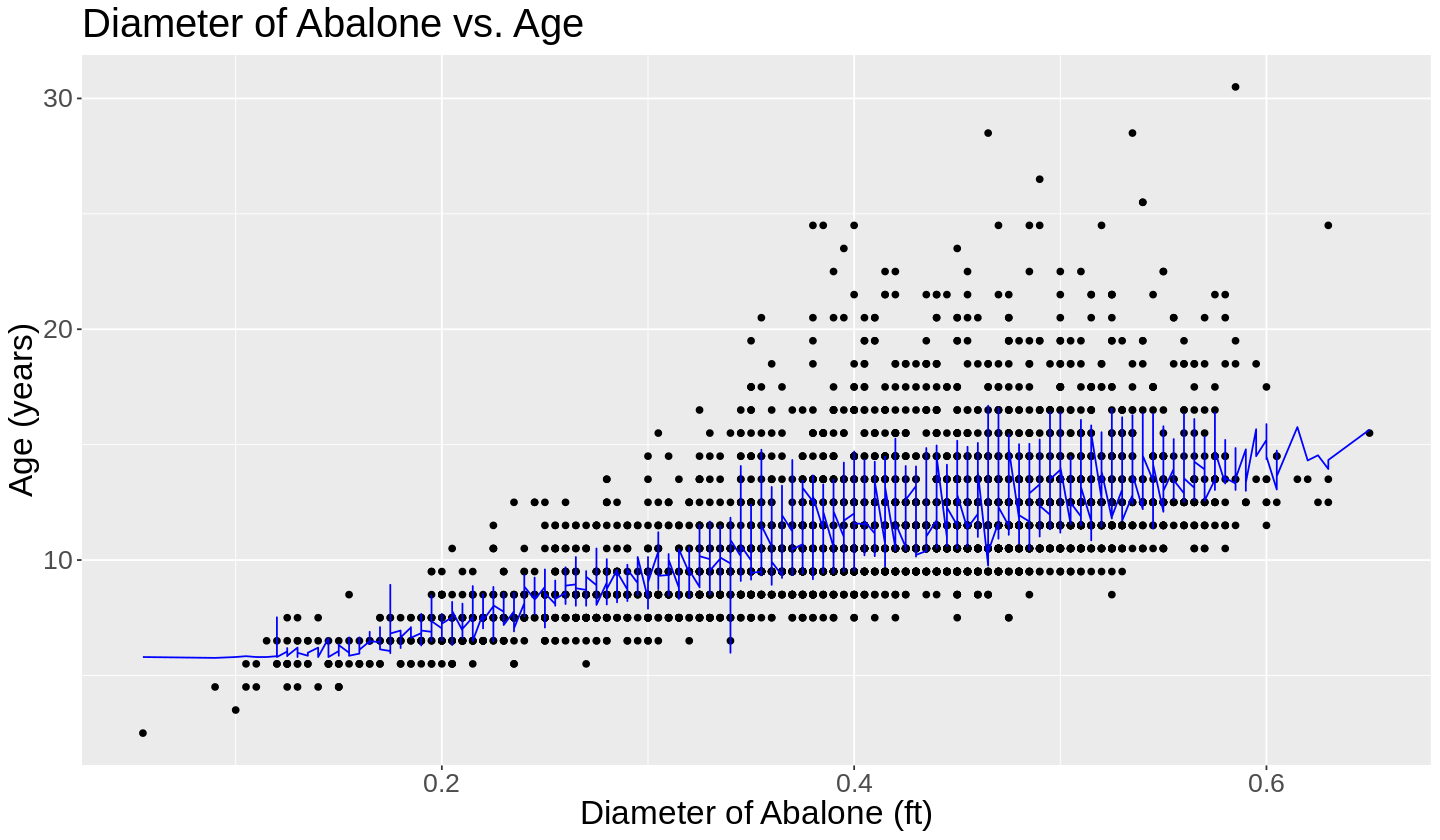

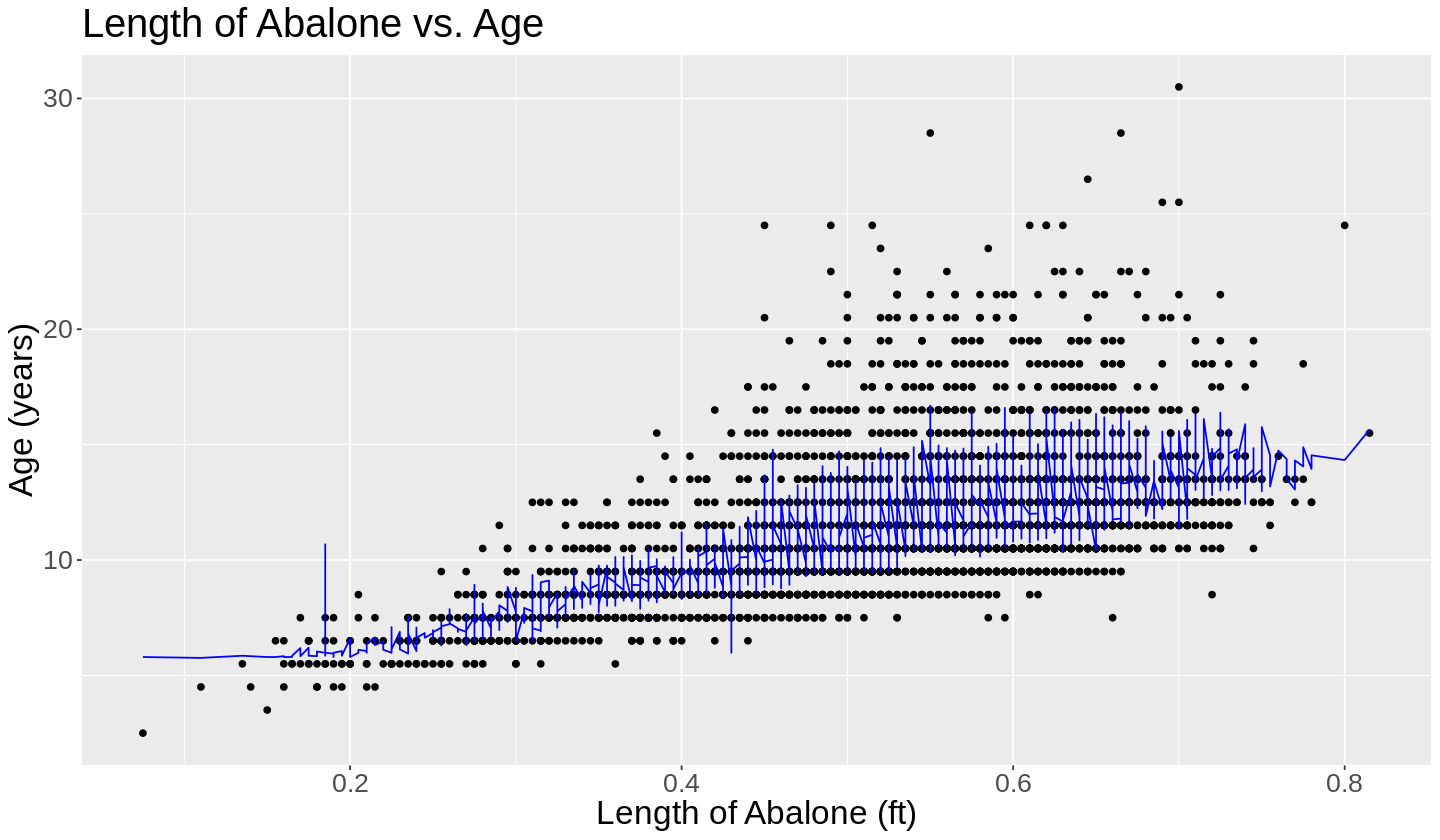

In [26]:
abalone_preds <- predict(abalone_workflow, abalone_train) |>
    bind_cols(abalone_train)
abalone_preds

abalone_plot_1 <- abalone_preds |>
    ggplot(aes(x = Whole.weight, y = Age)) +
    geom_point()+ 
    geom_line(aes(x = Whole.weight, y = .pred) ,color = "blue")+
    labs(x = "Whole Weight of Abalone (lb)", y = "Age (years)", title = "Whole Weight of Abalone vs. Age")+
    theme(text = element_text(size = 20))

abalone_plot_1

abalone_plot_2 <- abalone_preds |>
    ggplot(aes(x = Diameter, y = Age)) +
    geom_point()+ 
    geom_line(aes(x = Diameter, y = .pred) ,color = "blue")+
    labs(x = "Diameter of Abalone (ft)", y = "Age (years)", title = "Diameter of Abalone vs. Age")+
    theme(text = element_text(size = 20))

abalone_plot_2

abalone_plot_3 <- abalone_preds |>
    ggplot(aes(x = Length, y = Age)) +
    geom_point()+ 
    geom_line(aes(x = Length, y = .pred) ,color = "blue")+
    labs(x = "Length of Abalone (ft)", y = "Age (years)", title = "Length of Abalone vs. Age")+
    theme(text = element_text(size = 20))

abalone_plot_3

## Methods

To perform our analysis, we used KNN regression. We chose this because we worried that the relationship between the predictors and the target variable, age, would not be linear. As well, the height, whole weight, and shell weight all have similar characteristics for each age. Thus, since these abalone have localized patterns, KNN regression is well suited for this problem.
To begin with our analysis, we first split our data into training and testing data, helping us perform our final RMSPE evaluation. We then created a recipe with the target variable, age, and all our predictors, height, whole weight, and shell weight. In addition, we scaled and centered the data so that we avoid biased impacts from any of our predictors.
As well, it is essential that we choose the best K (number of neighbors) for our dataset. This is because a K that is too small makes the model too sensitive while a K that is too big may ignore useful data. In this process, we used k-fold-cross-validation (10 folds)  and tuning for our model. This splits our data into multiple folds, trains the model on subsets of that data, and finally, evaluates the performance on the remaining fold. From the metrics we collected for each k, we filtered for RMSE value, arranged by mean, and then sliced the 1st row for the best K value, which was determined to be 54. 
Using this new K value, we retrained our model using the engine “kknn” and the mode “regression”. After creating the workflow and fitting the data, we were able to calculate the RMSPE of our model by evaluating our testing data. With the predict() function, we obtained a prediction for each observation and by using metrics(), we were able to obtain our RMSPE of 2.39.



## Discussion

Ultimately, we found that our model was able to predict the age of the abalones based on the three predictors (whole weight, diameter, and length) with an error of about 2.39 years. We expected our model to be a good predictor of the actual abalone age, and this was what we found because our RMSPE value of about 2.39 means that our model is able to predict the actual age of abalone with an error of about ∓2.39 years. Although we are used to a “good” RMSPE value of less than 1 from our in-class worksheets, when we put our project’s RMSPE value into perspective, and considering the abalone age values in our dataset range up to 30 years of age, we can see that it is actually quite good. For instance, if an abalone were 20 years old, then our model could predict its age to be anywhere from about 18 to 22 years old. Being able to predict the age of anything within 2 years of its actual age is a rather significant feat in terms of accuracy, thus overall our model was a success.
We also chose the three predictive variables due to their high correlation value when regressed against the age variable using the ggpair() function. We then have additional graphs depicting each predictor variable against our target variable to better see the line of best fit. From the graph, we used imperial units of lbs and feet, similar to the original data.
Our findings are potentially quite impactful, particularly for the fields of conservation and marine management. With the use of easily measurable variables to determine the age of abalone, this could be utilized to measure and monitor the growth and health of abalone populations. It could also contribute to the improvement and increased sustainability of aquaculture. By utilizing easily determinable characteristics of abalone, farmers could determine optimal harvesting length for more sustainable and environmentally friendly harvesting.
There are countless areas and questions for further study, for example, examining how the age of abalone varies across different geographical habitats. The impacts of pollution on the growth and age of abalone could be a promising area of future study as well. 


Summarize what you found!

Ultimately, we found that our model was able to predict the age of the abalones based on the three predictors (whole weight, diameter, and length) to an accuracy of about 2.39 years. Considering the abalone age values in our dataset range up to 30 years of age, this is relatively accurate. 
Discuss whether this is what you expected to find?
Yes, this was what we expected to find because our RMSPE value of about 2.39 means that our model is able to predict the actual age of abalone with an error of about ∓2.39 years. Although we are used to a “good” RMSPE value of less than 1 from our in-class worksheets, when we put our project’s RMSPE value into perspective we can see that it is actually quite good. For instance, if an abalone were 20 years old, then our model could predict its age to be anywhere from about 18 to 22 years old. Being able to predict the age of anything within 2 years of its actual age is a rather significant feat in terms of accuracy, thus overall our model was a success.

Discuss what impact could such findings have? <br>
*Conservation and Marine Management*<br>
The result of this regression analysis project plays an important role in the conservation and management efforts related to abalone populations. By being able to determine the relationship between abalone’s age and easily measurable variables such as weight, diameter, and length, it becomes possible to assess the growth and health of abalone populations more effectively. Conservationists and marine managers can utilize this as indicator to monitor and evaluate the status of abalone populations, identify growth rates, and implement conservation measures. This knowledge contributes to the sustainable management and conservation of abalone, promoting these important marine species' long-term health. <br>
*Similar Studies on Different Species*<br>
The methodology and approach used in this research can serve as a template for conducting similar studies on different shellfish species. By examining the relationships between age and easily measurable physical characteristics, researchers can learn about various shellfish species' growth patterns and history traits. Understanding these relationships across different species can provide more understanding of growth and contribute to the conservation and management of other economically and ecologically important shellfish populations.<br>
*Improvement of Abalone Aquaculture*<br>
The findings of this regression analysis project are important for the improvement of abalone aquaculture practices. By using easily determinable characteristics such as weight, diameter, and length, abalone farmers can estimate the age of individual abalone more accurately. This information can be used to determine optimal harvesting age and season, ensuring that abalone is harvested at the appropriate stage of growth for maximum yield and quality. This will in turn increase the efficiency and profitability of abalone farming operations.

Discuss what future questions could this lead to?
- How does the age of abalone vary across different geographical habitats?
- What impact does pollution have on the growth and age of abalone?
- At what age should abalone be optimally harvested based on its size and weight?


## References 

Hossain, M. M., & Chowdhury, M. N. (2019, January). *Econometric Ways to Estimate the Age and Price of Abalone*.  &emsp;  &emsp;  &emsp;  &emsp; &emsp; &emsp;  &emsp;  &emsp;  &emsp; (MPRA Paper No. 91210). https://mpra.ub.uni-muenchen.de/91210/1/MPRA_paper_91210.pdf

Indumathi, H. (2021, February 25). Abalone Age Prediction. Medium. Retrieved June 23, 2023, from https://harshithaindumathi.medium.com/abalone-age-prediction-607ecda3fa3b


Venter, L., Loots, D. T., Vosloo, A., Rensburg, P. J. v., & Lindeque, J. Z. (2018). &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; Abalone growth and associated aspects: now from a metabolic perspective. *Reviews in Aquaculture, 10*(2), 451-473.  &emsp; &emsp; &emsp; &emsp; &emsp;  https://doi.org/10.1111/raq.12181